# Python Libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import csv
import os
import tweepy
import json
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

# Gathering Data

## WeRateDogs Twitter archive

In [2]:
#Loading .tsv file content into a Pandas Data Frame
tw_archive = pd.read_csv('twitter-archive-enhanced.csv')

## Tweet image predictions

In [3]:
#Obtaining Current Working Directory
cwd = os.getcwd()
#Link to download file
tsv_link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#Using requests lirary to open link
response = requests.get(tsv_link)
#Opening a file on CWD,creating a tsv file and writing the link's content into the file
with open (os.path.join(cwd, tsv_link.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
#Loading .tsv file content into a Pandas Data Frame
image_archive_df = pd.read_csv('image-predictions.tsv', sep = '\t')

## Tweeter API Connection

In [4]:
#File name to save twitter Json info
json_file = "tweet_json.txt"

#API Keys and Acess Tokens
# consumer_key = 
# consumer_secret = 
# access_token =
# access_secret = 

# #Set up Twitter access
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)
# api = tweepy.API(auth)

#Write json txt file with all twitter entries
rewrite_txt = 0; 
i=0; #to set up begin and end of file

if rewrite_txt == 1: #if file was written, do not run routine again
    with open (os.path.join(cwd, json_file), mode = 'w') as file:
        file.write("[")
        for tweet_id in tw_archive.tweet_id:
            try:
                tweet = api.get_status(tweet_id,
                               tweet_mode='extended',
                               wait_on_rate_limit= True, 
                               wait_on_rate_limit_notify= True)
                file.write(json.dumps(tweet._json))
                if i != len(tw_archive.tweet_id)-1:
                    file.write(",\n")#if last entry, do not add new line
            except:
                  print("Tweet %d not available anymore" %(tweet_id))
            i += 1
        file.write("]")

    


## Creating Tweet API Dataframe

In [5]:
with  open (os.path.join(cwd, json_file)) as json_read:
    data = json.load(json_read)

tweeter_api_dict = []  

for p in data:
    try: #If the tweet json file has all the information
        tweeter_api_dict.append({'created_at': p['created_at'],
                                 'tweet_id': p['id_str'],
                                 'full_text': p['full_text'],
                                 'favorite_count': p['favorite_count'],
                                 'retweet_count': p['retweet_count'],
                                 'url': p['entities']['media'][0]['url'],
                                 'in_reply_to_user_id' : p['in_reply_to_user_id']
                                })
    except: # Some json entries do not have the media url entry
        tweeter_api_dict.append({'created_at': p['created_at'],
                                 'tweet_id': p['id_str'],
                                 'full_text': p['full_text'],
                                 'favorite_count': p['favorite_count'],
                                 'retweet_count': p['retweet_count'],
                                 'url': '',
                                 'in_reply_to_user_id' : p['in_reply_to_user_id']
                                })
            

    
    
    
tweeter_api_df  = pd.DataFrame(tweeter_api_dict, 
                               columns = ['tweet_id',
                                          'created_at', 
                                          'full_text', 
                                          'favorite_count',
                                          'retweet_count',
                                          'url',
                                          'in_reply_to_user_id'
                                         ])

In [6]:
tweeter_api_df.head()


,tweet_id,created_at,full_text,favorite_count,retweet_count,url,in_reply_to_user_id
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...,39252,8762,https://t.co/MgUWQ76dJU,NaN
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....,33619,6422,https://t.co/0Xxu71qeIV,NaN
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...,25330,4265,https://t.co/wUnZnhtVJB,NaN
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...,42612,8854,https://t.co/tD36da7qLQ,NaN
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...,40785,9636,https://t.co/AtUZn91f7f,NaN


# Assessing Data

## Twitter Archive Dataset

In [7]:
tw_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob


### Quality
- NaN Values on collumns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, 
- Dog's names missing or incorrect, Should be obtained from tweet text
- Type of dog missing (doggo, floofer, pupper, puppo)
- Timestamp column type str. Change to timedate object
- Missing values on expanded_urls column and other columns
- Some ratings are not correct, these should be obtained from the tweet text
- Only 380 entries have a define dog stage (puppo, fluffo, etc)
- There are entries which have two different dog stages assigned. These will be removed and just one dog stage will be considered. These are the tweet IDs with multiple dog stage assigned: 
         - 854010172552949760
         - 817777686764523521
         - 808106460588765185
         - 802265048156610565
         - 801115127852503040
         - 785639753186217984
         - 781308096455073793
         - 775898661951791106
         - 770093767776997377
         - 759793422261743616
         - 751583847268179968
         - 741067306818797568
         - 733109485275860992
         - 855851453814013952




### Tidiness
- Dog stage is now 4 columns, should be merged into just one. 
- Text column has the tweet link added. This should be moved to a different column on it self
- Drop columns expanded_urls, in_reply_to_status_id, , in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp,
- Add column with retweeted_count and favorite_count
- Source column does not add any information to the table, should be dropped

## Image Prediction Dataset

In [9]:
image_archive_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
image_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB



### Quality
- Breed names have a underscore, capitalize 1st letter of breed


### Tidiness
- This table is not necessary as standalone, since it does not add lot of new information. The breed of the dog can be added to the Twitter archive table to be more complete 
- Merge together the breed prediction(the best) and use that single value on the main dataframe

## Tweeter API Dataset

In [11]:
tweeter_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 7 columns):
tweet_id               2349 non-null object
created_at             2349 non-null object
full_text              2349 non-null object
favorite_count         2349 non-null int64
retweet_count          2349 non-null int64
url                    2349 non-null object
in_reply_to_user_id    78 non-null float64
dtypes: float64(1), int64(2), object(4)
memory usage: 128.5+ KB



### Quality
- Tweet ID 810984652412424192 does not have a rating. It can not be obtained from the archive dataset nor the information obtained from the API This entry rating will be defined as 10/10
- Tweet ID 826598799820865537 has a rating of 007/10, since it was a joke by the author. No real rating was given. This entry rating will be defined as 10/10
- Some entries have incorrect ratings due to the programmatic data gathering, this will be corrected individually
    - 835246439529840640
    - 740373189193256964
    - 682962037429899265
    - 722974582966214656
    - 686035780142297088
    - 716439118184652801
    - 881633300179243008
- Following Tweet ID are not about a dog, and should be removed.
    - 832088576586297345
    - 838150277551247360
- Older tweets do not have the Dogs name available from the text. The author changed the tweet format at some point, where all tweets start with the Dog's name. Results in some tweets do not have the dogs name available.
- Change All dog's without a defined name with the string 'Not Defined', results in 760 Tweets with no names
- Some tweets text do not have the short link to the tweet. This will be corrected, long url will be used.
- Some tweets are reteweets and need to be removed (29). There are many self retweets (47), those will be considered original and will be kept on the dataset
- There are tweets that are self repeated re tweets. Originals should be kept. Such as:
    - 879130579576475649 retweet of 878057613040115712
    - 868639477480148993 retweet of 868552278524837888
    - 871166179821445120 retweet of 841077006473256960
- Retweets from other accounts have a text that starts with "RT". All these tweets (176) will be removed since are not original


### Tidiness
- 

# Cleaning Data


## Creating New Dataframe Copies

In [12]:
tw_archive_clean = tw_archive.copy()
tweeter_api_df_clean = tweeter_api_df.copy()
image_archive_df_clean = image_archive_df.copy()

## Extracting Values From JSON File Text Entries

#### Define
    - There is not a column with dogs names
    - Remove link from full text
    - Add Rating columns

In [13]:
list(tweeter_api_df_clean)

['tweet_id',
 'created_at',
 'full_text',
 'favorite_count',
 'retweet_count',
 'url',
 'in_reply_to_user_id']

In [14]:
tweeter_api_df_clean.iloc[0].full_text

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

#### Code


In [15]:
name = []
tweet_link = []
full_text = []

for text in tweeter_api_df_clean.full_text:
    temp_name = text.split('.')[0].split(' ')[-1]
    
    if len(temp_name) == 0 or len(temp_name) == 1: #Some text do not have the dogs name
        name.append('Not Defined')
    elif temp_name[0].islower() or temp_name[0].isalpha() == False: # All tweets with the dogs name will start with a capital letter
        name.append('Not Defined') 
    elif temp_name[0].isdigit(): #Some tweet texts are short, so algorithm mistaknly takes rating as name
        name.append('Not Defined') 
    else:
        name.append(temp_name)
        
    full_text.append(text.split('https:')[0])
    
tweeter_api_df_clean['name'] = name
tweeter_api_df_clean['full_text'] = full_text 


### Using REGEX to Extract Ratings

In [16]:
# User Regex to obtain de ratings
s = tweeter_api_df_clean.full_text
regexp = '(?P<Numerator>[0-9]?[0-9]?[0-9]?[0-9])/(?P<denominator>[0-9]?[0-9][0-9])'
test_df = s.str.extract(regexp,expand=True)

tweeter_api_df_clean['rating_num'] = test_df.Numerator
tweeter_api_df_clean['rating_den'] = test_df.denominator

#### Test
    - name, rating_num, rating_den column added and values gathered
    - full_text columns no longer contains the link

In [17]:
tweeter_api_df_clean.iloc[0]

tweet_id                                              892420643555336193
created_at                                Tue Aug 01 16:23:56 +0000 2017
full_text              This is Phineas. He's a mystical boy. Only eve...
favorite_count                                                     39252
retweet_count                                                       8762
url                                              https://t.co/MgUWQ76dJU
in_reply_to_user_id                                                  NaN
name                                                             Phineas
rating_num                                                            13
rating_den                                                            10
Name: 0, dtype: object

In [18]:
tweeter_api_df_clean.iloc[0].full_text

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 "

### Individually Correcting Abnormal Ratings

#### Define
    - Several Abnormal Ratings Corrected, such as NaN or Pun ratings

In [19]:
tweeter_api_df_clean[tweeter_api_df_clean.rating_num.isnull() == True]

,tweet_id,created_at,full_text,favorite_count,retweet_count,url,in_reply_to_user_id,name,rating_num,rating_den
511,810984652412424192,Mon Dec 19 23:06:23 +0000 2016,Meet Sam. She smiles 24/7 &amp; secretly aspir...,5880,1631,https://t.co/LouL5vdvxx,NaN,Sam,NaN,NaN


In [20]:
tweeter_api_df_clean[tweeter_api_df_clean.tweet_id == '826598799820865537']

,tweet_id,created_at,full_text,favorite_count,retweet_count,url,in_reply_to_user_id,name,rating_num,rating_den
382,826598799820865537,Wed Feb 01 01:11:25 +0000 2017,"I was going to do 007/10, but the joke wasn't ...",5587,289,,4.196984e+09,Not Defined,007,10


#### Code

In [21]:
# Change entry which has NaN rating and incorrect ratings
tweeter_api_df_clean.loc[tweeter_api_df_clean[tweeter_api_df_clean.rating_num.isnull() == True].index[0],'rating_num'] = '10'
tweeter_api_df_clean.loc[tweeter_api_df_clean[tweeter_api_df_clean.rating_den.isnull() == True].index[0],'rating_den'] = '10'
tweeter_api_df_clean.loc[tweeter_api_df_clean[tweeter_api_df_clean.tweet_id == '826598799820865537'].index[0],'rating_num'] = '10'
tweeter_api_df_clean.loc[tweeter_api_df_clean[tweeter_api_df_clean.tweet_id == '826598799820865537'].index[0],'rating_den'] = '10'
tweeter_api_df_clean.loc[tweeter_api_df_clean[tweeter_api_df_clean.tweet_id == '835246439529840640'].index[0],'rating_num'] = '13'
tweeter_api_df_clean.loc[tweeter_api_df_clean[tweeter_api_df_clean.tweet_id == '835246439529840640'].index[0],'rating_den'] = '10'
tweeter_api_df_clean.loc[tweeter_api_df_clean[tweeter_api_df_clean.tweet_id == '740373189193256964'].index[0],'rating_num'] = '14'
tweeter_api_df_clean.loc[tweeter_api_df_clean[tweeter_api_df_clean.tweet_id == '740373189193256964'].index[0],'rating_den'] = '10'
tweeter_api_df_clean.loc[tweeter_api_df_clean[tweeter_api_df_clean.tweet_id == '682962037429899265'].index[0],'rating_num'] = '10'
tweeter_api_df_clean.loc[tweeter_api_df_clean[tweeter_api_df_clean.tweet_id == '682962037429899265'].index[0],'rating_den'] = '10'
tweeter_api_df_clean.loc[tweeter_api_df_clean[tweeter_api_df_clean.tweet_id == '722974582966214656'].index[0],'rating_num'] = '13'
tweeter_api_df_clean.loc[tweeter_api_df_clean[tweeter_api_df_clean.tweet_id == '722974582966214656'].index[0],'rating_den'] = '10'
tweeter_api_df_clean.loc[tweeter_api_df_clean[tweeter_api_df_clean.tweet_id == '686035780142297088'].index[0],'rating_num'] = '12'
tweeter_api_df_clean.loc[tweeter_api_df_clean[tweeter_api_df_clean.tweet_id == '686035780142297088'].index[0],'rating_den'] = '10'
tweeter_api_df_clean.loc[tweeter_api_df_clean[tweeter_api_df_clean.tweet_id == '716439118184652801'].index[0],'rating_num'] = '11'
tweeter_api_df_clean.loc[tweeter_api_df_clean[tweeter_api_df_clean.tweet_id == '716439118184652801'].index[0],'rating_den'] = '10'
tweeter_api_df_clean.loc[tweeter_api_df_clean[tweeter_api_df_clean.tweet_id == '881633300179243008'].index[0],'rating_num'] = '13'
tweeter_api_df_clean.loc[tweeter_api_df_clean[tweeter_api_df_clean.tweet_id == '881633300179243008'].index[0],'rating_den'] = '10'


In [22]:
# Remove entries which are not about dog ratings
tweeter_api_df_clean.drop(tweeter_api_df_clean[tweeter_api_df_clean.tweet_id == '838150277551247360'].index[0], inplace=True)
tweeter_api_df_clean.drop(tweeter_api_df_clean[tweeter_api_df_clean.tweet_id == '832088576586297345'].index[0], inplace=True)


#### Test

In [23]:
tweeter_api_df_clean[tweeter_api_df_clean.tweet_id == '826598799820865537']

,tweet_id,created_at,full_text,favorite_count,retweet_count,url,in_reply_to_user_id,name,rating_num,rating_den
382,826598799820865537,Wed Feb 01 01:11:25 +0000 2017,"I was going to do 007/10, but the joke wasn't ...",5587,289,,4.196984e+09,Not Defined,10,10


### Changing Ratings From String to Integer Type

In [24]:
# Transform ratings from type string to integer
for index in tweeter_api_df_clean.index: 
    try:
        tweeter_api_df_clean.loc[index,'rating_num'] = int(tweeter_api_df_clean.rating_num[index])
        tweeter_api_df_clean.loc[index,'rating_den'] = int(tweeter_api_df_clean.rating_den[index])
    except:
        pass


## Cleaning Dog Stages Information

#### Define
    - Reducing Dog Stages columns from 4 to 1 by melting and combining values

In [25]:
list(tw_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### Code

In [26]:
#Dropping Non important columns
tw_archive_clean = tw_archive_clean.drop('in_reply_to_status_id', 1)
tw_archive_clean = tw_archive_clean.drop('in_reply_to_user_id', 1)
tw_archive_clean = tw_archive_clean.drop('source', 1)
tw_archive_clean = tw_archive_clean.drop('retweeted_status_id', 1)
tw_archive_clean = tw_archive_clean.drop('retweeted_status_user_id', 1)
tw_archive_clean = tw_archive_clean.drop('retweeted_status_timestamp', 1)
tw_archive_clean = tw_archive_clean.drop('expanded_urls', 1)
tw_archive_clean = tw_archive_clean.drop('timestamp', 1)               

In [27]:
#Creating new column that states which dog states are defined and which are not
temp = []
for i in range(0, len(tw_archive_clean.tweet_id)):
    if tw_archive_clean.doggo[i] == 'None' and tw_archive_clean.floofer[i] == 'None' and tw_archive_clean.pupper[i] == 'None' and tw_archive_clean.puppo[i] == 'None':
        temp.append('not_defined')
    else:
        temp.append('defined')
        
tw_archive_clean['not_defined'] = temp


### Melting Dog Stage Columns

In [28]:
# Melting dog_stage columns together
tw_archive_clean = pd.melt(tw_archive_clean, id_vars=['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name'],
                                    var_name='dog_stage',
                                    value_name='temp_dog_stage')
tw_archive_clean = tw_archive_clean[tw_archive_clean.dog_stage == tw_archive_clean.temp_dog_stage]

# Removing entries that have multiple dog_stage assigned
for index in tw_archive_clean.tweet_id[tw_archive_clean.tweet_id.duplicated()].index:
    tw_archive_clean.drop(index, inplace=True)
    
# Dropping the column that adds no information
tw_archive_clean = tw_archive_clean.drop('temp_dog_stage', 1)

### Updating API Dataframe With Dog Stage Information

In [29]:
# Updating the tweeter_api_df_clean with the new dog_stage
dog_stage_new = []
for tweet_id in  tweeter_api_df_clean.tweet_id:
    dog_stage_new.append(tw_archive_clean.loc[tw_archive_clean.loc[tw_archive_clean.tweet_id == int(tweet_id)].index[0]].dog_stage)
# Adding a new column
tweeter_api_df_clean['dog_stage'] = dog_stage_new

#### Test

In [30]:
list(tweeter_api_df_clean)

['tweet_id',
 'created_at',
 'full_text',
 'favorite_count',
 'retweet_count',
 'url',
 'in_reply_to_user_id',
 'name',
 'rating_num',
 'rating_den',
 'dog_stage']

In [31]:
tweeter_api_df_clean[tweeter_api_df_clean.dog_stage == 'pupper']

,tweet_id,created_at,full_text,favorite_count,retweet_count,url,in_reply_to_user_id,name,rating_num,rating_den,dog_stage
28,886366144734445568,Sat Jul 15 23:25:31 +0000 2017,This is Roscoe. Another pupper fallen victim t...,21380,3264,https://t.co/RGE08MIJox,NaN,Roscoe,12,10,pupper
48,882762694511734784,Thu Jul 06 00:46:41 +0000 2017,This is Gus. He's quite the cheeky pupper. Alr...,28655,5047,https://t.co/D43I96SlVu,NaN,Gus,12,10,pupper
55,881536004380872706,Sun Jul 02 15:32:16 +0000 2017,Here is a pupper approaching maximum borkdrive...,50037,16418,https://t.co/ghXBIIeQZF,NaN,Not Defined,14,10,pupper
77,877611172832227328,Wed Jun 21 19:36:23 +0000 2017,RT @rachel2195: @dog_rates the boyfriend and h...,0,82,https://t.co/dJx4Gzc50G,NaN,Not Defined,14,10,pupper
81,876838120628539392,Mon Jun 19 16:24:33 +0000 2017,This is Ginger. She's having a ruff Monday. To...,20949,3470,https://t.co/j211oCDRs6,NaN,Ginger,12,10,pupper
91,874296783580663808,Mon Jun 12 16:06:11 +0000 2017,This is Jed. He may be the fanciest pupper in ...,26425,4246,https://t.co/0YplNnSMEm,NaN,Jed,13,10,pupper
95,873337748698140672,Sat Jun 10 00:35:19 +0000 2017,RT @dog_rates: This is Sierra. She's one preci...,0,1639,,NaN,Sierra,12,10,pupper
96,873213775632977920,Fri Jun 09 16:22:42 +0000 2017,This is Sierra. She's one precious pupper. Abs...,7391,1639,https://t.co/V5lkvrGLdQ,NaN,Sierra,12,10,pupper
105,871762521631449091,Mon Jun 05 16:15:56 +0000 2017,This is Rover. As part of pupper protocol he h...,20603,3615,https://t.co/AiVljI6QCg,NaN,Rover,12,10,pupper
129,866816280283807744,Tue May 23 00:41:20 +0000 2017,RT @dog_rates: This is Jamesy. He gives a kiss...,0,32475,,NaN,Jamesy,13,10,pupper


## Cleaning Tweet Dog API Dataframe From Retweeted Entries

#### Define
    - Clean Reteweets
    - Define URLs for tweets that are missing them
    - Correcting Dog Breeds names

In [32]:
tweeter_api_df_clean[(tweeter_api_df_clean.in_reply_to_user_id.isnull() == False) & (tweeter_api_df_clean.in_reply_to_user_id != 4196983835)].sample()

,tweet_id,created_at,full_text,favorite_count,retweet_count,url,in_reply_to_user_id,name,rating_num,rating_den,dog_stage
1516,690607260360429569,Fri Jan 22 18:49:36 +0000 2016,12/10 @LightningHoltt,308,19,,467036706.0,Not Defined,12,10,not_defined


In [33]:
tweeter_api_df_clean[tweeter_api_df_clean.url == ''].sample()

,tweet_id,created_at,full_text,favorite_count,retweet_count,url,in_reply_to_user_id,name,rating_num,rating_den,dog_stage
1837,675849018447167488,Sun Dec 13 01:25:37 +0000 2015,This dog is being demoted to a 9/10 for not we...,1011,169,,4.196984e+09,Not Defined,9,10,not_defined


In [34]:
image_archive_df.p1.sample()

938    window_shade
Name: p1, dtype: object

#### Code

In [35]:
# Remove all retweets from other users, keeps self re tweets
for index in tweeter_api_df_clean[(tweeter_api_df_clean.in_reply_to_user_id.isnull() == False) & (tweeter_api_df_clean.in_reply_to_user_id != 4196983835)].index :
    tweeter_api_df_clean.drop(index, inplace = True)

In [36]:
# Removing Retweets from dataframe
ids_to_remove = []
for i in range(0,len(tweeter_api_df_clean.full_text)):
    try:
        if tweeter_api_df_clean.full_text[i].split(' ')[0] == 'RT': #Retweets have "RT" in the beginning of text
            ids_to_remove.append(tweeter_api_df_clean.tweet_id[i])          
    except:
        pass

# Remove all not original self retweets:
for index in tweeter_api_df_clean[tweeter_api_df_clean.tweet_id.isin(ids_to_remove)].index:
    tweeter_api_df_clean.drop(index, inplace = True)

#Dropping Non important columns
tweeter_api_df_clean = tweeter_api_df_clean.drop('in_reply_to_user_id', 1)

## Defining URLs for Tweet Entries Without Them

In [37]:
# Tweets which do not have a short url defined, replace with long url.
for index in  tweeter_api_df_clean[tweeter_api_df_clean.url == ''].index :
    new_url = "https://twitter.com/dog_rates/status/" + tweeter_api_df_clean.tweet_id[index]
    tweeter_api_df_clean.loc[index,'url'] = new_url


## Correcting Dog Breeds Names With Capitals and Remove Underscores

In [38]:
# Replacing the underscores of Breed names and capitalize first lettter
for i in range(0,len(image_archive_df)):
    image_archive_df.loc[i,'p1'] = image_archive_df.p1[i].replace('_',' ').title()
    image_archive_df.loc[i,'p2'] = image_archive_df.p2[i].replace('_',' ').title()
    image_archive_df.loc[i,'p3'] = image_archive_df.p3[i].replace('_',' ').title()


## Reducing Breed Predictions to Best One and Merging With Main Dataset

In [39]:
s1 = ['p1_dog','p2_dog','p3_dog']
for index in tweeter_api_df_clean.index: 
    tweet_id = tweeter_api_df_clean.tweet_id[index] #Id to look for on image dataframe
    is_dog = [] #Check if prediction is a dog Breed
    try:
        for j in range(0,3):
            is_dog.append(image_archive_df.loc[image_archive_df.loc[image_archive_df.tweet_id == int(tweet_id)].index[0], s1[j]])
            
            if is_dog[j]: # if we have a True on dog Breed
                breed_prediction = image_archive_df.loc[image_archive_df.loc[image_archive_df.tweet_id == int(tweet_id)].index[0], s1[j][0:2]]
                break
            elif j == 2: #if dog breed is not found
                breed_prediction = 'Not Defined'
                
         
    except: # If tweet Id not found on image prediction dataframe
        breed_prediction = 'Not Defined'
        
    # Create and Update Breed Columns on Main dataset
    tweeter_api_df_clean.loc[index,'breed'] = breed_prediction  

#### Test

In [40]:
list(tweeter_api_df_clean)

['tweet_id',
 'created_at',
 'full_text',
 'favorite_count',
 'retweet_count',
 'url',
 'name',
 'rating_num',
 'rating_den',
 'dog_stage',
 'breed']

In [41]:
tweeter_api_df_clean[tweeter_api_df_clean.url == '']

,tweet_id,created_at,full_text,favorite_count,retweet_count,url,name,rating_num,rating_den,dog_stage,breed


In [42]:
image_archive_df.p1.sample()

904    Golden Retriever
Name: p1, dtype: object

## Changing Column Variable Types

### Changing Created_at Column From String to Datatime Type

In [43]:
for index in tweeter_api_df_clean.index: 
    test_time = tweeter_api_df_clean.loc[index,'created_at'].replace(' +0000','')
    tweeter_api_df_clean.loc[index,'created_at'] = pd.to_datetime(test_time, format='%a %b %d %H:%M:%S %Y', errors='ignore')
    
tweeter_api_df_clean.created_at = pd.to_datetime(tweeter_api_df_clean.created_at)

### Changing From String to Integers

In [44]:
tweeter_api_df_clean.tweet_id = pd.to_numeric(tweeter_api_df_clean.tweet_id)
tweeter_api_df_clean.rating_num = pd.to_numeric(tweeter_api_df_clean.rating_num)
tweeter_api_df_clean.rating_den = pd.to_numeric(tweeter_api_df_clean.rating_den)

# Storing Final Clean Dataframe

## Creating New Clean Copy 

In [45]:
#Clean DF copy with reseted indexes
twitter_archive_master = tweeter_api_df_clean.copy().reset_index(drop=True)

## Storing on CSV format

In [46]:
twitter_archive_master.to_csv(os.path.join(cwd,'twitter_archive_master.csv'), index=False)

## Storing on SQL Format

### Connect to a database

In [47]:
# Create SQLAlchemy Engine and empty twitter_archive_master database

engine = create_engine('sqlite:///twitter_archive_master.db')

###  Store pandas DataFrame in database
Store the data in the cleaned master dataset (twitter_archive_master) in that database.

In [48]:
# Store cleaned master DataFrame ('twitter_archive_master') in a table called master in twitter_archive_master.db
twitter_archive_master.to_sql('master', engine, index=False, if_exists = 'replace')

## Creating Analytics Dataframes

### All Dog Breeds

In [49]:
#List of all dog breeds
dog_breeds = twitter_archive_master.breed.value_counts().index.tolist()

### Grouping Stats by Dog Breed

In [50]:
# Create Dict grouped by dog breed (All dog breeds present on DF)
dog_breed_stats = {}
for dog_breed in dog_breeds:
    dog_breed_stats[dog_breed] = {'count':[], 'count_per':[], 'favorite_count_sum':[],'retweet_count_sum':[], 
                                  'rating_num_mean' : [],'rating_den_mean' : [],
                                  'favorite_count_mean' : [],'retweet_count_mean' : []}


### Gathering Statistics of Each Breed

In [51]:
# Gathering stats about each dog breed
for key in dog_breed_stats.keys():
        #print(dog_breed_stats[key]['count'])
        dog_breed_stats[key]['count'] = twitter_archive_master[twitter_archive_master.breed == key].tweet_id.count()
        dog_breed_stats[key]['count_per'] = 100 * twitter_archive_master[twitter_archive_master.breed == key].tweet_id.count()/twitter_archive_master.count()[0]
        dog_breed_stats[key]['favorite_count_sum'] = twitter_archive_master[twitter_archive_master.breed == key].favorite_count.sum()
        dog_breed_stats[key]['retweet_count_sum'] = twitter_archive_master[twitter_archive_master.breed == key].retweet_count.sum()
        dog_breed_stats[key]['rating_num_mean'] = twitter_archive_master[twitter_archive_master.breed == key].rating_num.mean()
        dog_breed_stats[key]['rating_den_mean'] = twitter_archive_master[twitter_archive_master.breed == key].rating_den.mean()
        dog_breed_stats[key]['favorite_count_mean'] = twitter_archive_master[twitter_archive_master.breed == key].favorite_count.mean()
        dog_breed_stats[key]['retweet_count_mean'] = twitter_archive_master[twitter_archive_master.breed == key].retweet_count.mean()

### Creating and Storing Breed Statistics Dataframe

In [52]:
#Creating Dataframe
dog_breed_stats_df  = pd.DataFrame([],
                                   index = dog_breed_stats.keys(),
                                   columns = dog_breed_stats[dog_breeds[0]].keys())
#Populating Dataframe
for index in dog_breed_stats_df.index:
    for key in dog_breed_stats[dog_breeds[0]].keys():
        dog_breed_stats_df[key].loc[index] = dog_breed_stats[index][key]       

In [53]:
#Storing in CSV file
dog_breed_stats_df.to_csv(os.path.join(cwd,'dog_breed_stats.csv'), index=True)

# Store cleaned breed_stats DataFrame ('breed_stats') in a table called breed_stats in twitter_archive_master.db
dog_breed_stats_df.to_sql('breed_stats', engine, index=False, if_exists = 'replace')

## Grouping by Dog Stage

In [54]:
dog_stages = twitter_archive_master.dog_stage.value_counts().index.tolist()

stats =  ['count', 'count_per', 'favorite_count_sum','retweet_count_sum', 
                                  'rating_num_mean','rating_den_mean',
                                  'favorite_count_mean','retweet_count_mean']

#Creating Dataframe
dog_stages_stats_df  = pd.DataFrame([],
                                   index = stats,
                                   columns = dog_stages)

for dog_stage in dog_stages:
    dog_stages_stats_df[dog_stage].loc['count'] =  twitter_archive_master.groupby(['dog_stage']).get_group(dog_stage).dog_stage.count()
    dog_stages_stats_df[dog_stage].loc['count_per'] =  100 * twitter_archive_master.groupby(['dog_stage']).get_group(dog_stage).dog_stage.count()/twitter_archive_master.count()[0]
    dog_stages_stats_df[dog_stage].loc['favorite_count_sum'] =  twitter_archive_master.groupby(['dog_stage']).get_group(dog_stage).favorite_count.sum()
    dog_stages_stats_df[dog_stage].loc['retweet_count_sum'] =  twitter_archive_master.groupby(['dog_stage']).get_group(dog_stage).retweet_count.sum()
    dog_stages_stats_df[dog_stage].loc['favorite_count_mean'] =  twitter_archive_master.groupby(['dog_stage']).get_group(dog_stage).favorite_count.mean()
    dog_stages_stats_df[dog_stage].loc['retweet_count_mean'] =  twitter_archive_master.groupby(['dog_stage']).get_group(dog_stage).retweet_count.mean()
    dog_stages_stats_df[dog_stage].loc['rating_num_mean'] =  twitter_archive_master.groupby(['dog_stage']).get_group(dog_stage).rating_num.mean()
    dog_stages_stats_df[dog_stage].loc['rating_den_mean'] =  twitter_archive_master.groupby(['dog_stage']).get_group(dog_stage).rating_den.mean()
    
dog_stages_stats_df = dog_stages_stats_df.transpose()

#Storing in CSV file
dog_stages_stats_df.to_csv(os.path.join(cwd,'dog_stages_stats.csv'), index=True)

# Store cleaned breed_stats DataFrame ('breed_stats') in a table called breed_stats in twitter_archive_master.db
dog_stages_stats_df.to_sql('dog_stages_stats', engine, index=False, if_exists = 'replace')

### Grouping by Weekday 

In [55]:
weekday = {6: 'Sunday', 0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday'}
weekday_stats_temp = tweeter_api_df_clean.copy().drop(['tweet_id', 'full_text','url','name','dog_stage','breed', 'created_at'], axis=1)
weekday_series = []

for day in twitter_archive_master.created_at.dt.dayofweek:
    weekday_series.append(weekday[day])

weekday_stats_temp['weekday'] = weekday_series

#Creating Dataframe
weekday_stats_df  = pd.DataFrame([],
                                   index = stats,
                                   columns = weekday.values())    

for week_day in weekday.values():
    #print(week_day)
    weekday_stats_df[week_day].loc['count'] =  weekday_stats_temp.groupby(['weekday']).get_group(week_day).weekday.count()
    weekday_stats_df[week_day].loc['count_per'] =  100 * weekday_stats_temp.groupby(['weekday']).get_group(week_day).weekday.count()/twitter_archive_master.count()[0]
    weekday_stats_df[week_day].loc['favorite_count_sum'] =  weekday_stats_temp.groupby(['weekday']).get_group(week_day).favorite_count.sum()
    weekday_stats_df[week_day].loc['retweet_count_sum'] =  weekday_stats_temp.groupby(['weekday']).get_group(week_day).retweet_count.sum()
    weekday_stats_df[week_day].loc['favorite_count_mean'] =  weekday_stats_temp.groupby(['weekday']).get_group(week_day).favorite_count.mean()
    weekday_stats_df[week_day].loc['retweet_count_mean'] =  weekday_stats_temp.groupby(['weekday']).get_group(week_day).retweet_count.mean()
    weekday_stats_df[week_day].loc['rating_num_mean'] =  weekday_stats_temp.groupby(['weekday']).get_group(week_day).rating_num.mean()
    weekday_stats_df[week_day].loc['rating_den_mean'] =  weekday_stats_temp.groupby(['weekday']).get_group(week_day).rating_den.mean()


weekday_stats_df = weekday_stats_df.transpose()

#Storing in CSV file
weekday_stats_df.to_csv(os.path.join(cwd,'weekday_stats_df.csv'), index=True)

# Store cleaned breed_stats DataFrame ('weekday_stats_df') in a table called weekday_stats_df in twitter_archive_master.db
weekday_stats_df.to_sql('weekday_stats_df', engine, index=False, if_exists = 'replace')

# Data Analytics and Visualization

After the whole Gathering, Assessing and Claning process we end up with a dataset with 2142 observations. These are tweets from the WeRateDogs twitter account (https://twitter.com/dog_rates).

The most important Information gathered was kept on a tidy concise table. The author made an effort to remove all tweets not related to dogs. All reteweets were removed, just original tweets were kept on the dataset. All tweets kept do have the special rating system offered by the page author, http://knowyourmeme.com/memes/theyre-good-dogs-brent.

We will now proceed with a short evaluation of the data gathered and offer some insights. 

## Most Twitted Dog Breed

Ignoring the observations which did not produce any dog breed (457 - 21.33% of all observations), we have the following counts on the Top 6:

    - Golden Retriever                  158
    - Labrador Retriever                108
    - Pembroke                           95
    - Chihuahua                          91
    - Pug                                62
    - Toy Poodle                         51

Golden Retrievers are Labrador Retrievers are definetely the most popular dogs on Twitter. They out number all other breeds by a lot. The author of this study agrees with this data, Retrievers are definitely the coolest dogs out there. (The author is biased). We have a total of 112 different Dog Breeds on our dataset. Bellow is shown the whole dataset of all our breed of dogs and their respective statistics.

In [56]:
dog_breed_stats_df.head()

,count,count_per,favorite_count_sum,retweet_count_sum,rating_num_mean,rating_den_mean,favorite_count_mean,retweet_count_mean
Not Defined,457,21.3352,3409434,1228719,14.954,10.3632,7460.47,2688.66
Golden Retriever,158,7.37628,1946405,585506,12.943,11.2658,12319,3705.73
Labrador Retriever,108,5.04202,1262718,402389,13.6389,12.2222,11691.8,3725.82
Pembroke,95,4.43511,1040459,290206,11.4105,10,10952.2,3054.8
Chihuahua,91,4.24837,772178,258789,10.5495,10,8485.47,2843.84


If we take a look at the Top 15 most tweeted dog breeds, we will find the following information exemplified in this pie chart. Golden Retrievers take a lead with 18% of Tweets from the Top 15. Eskimo Dog closes the Top 15 with a 2.5% possesion of the Tweets. The insigh is if you want your dog to be featured on the WeRateDogs Twitter account, make sure you own a Golden Retriever, since this will you the best change to do so.

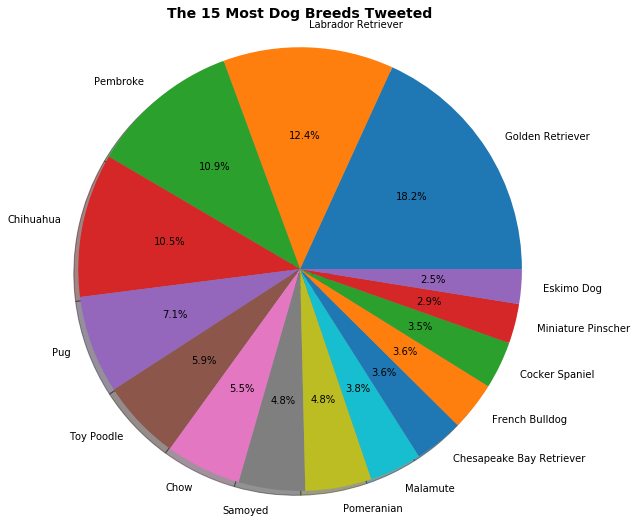

In [57]:
plt.figure(figsize=(10,9));

dog_breed_stats_df.transpose().iloc[0][1:16].plot(kind='pie',autopct='%1.1f%%', shadow=True);
plt.gca().axis("equal")
plt.ylabel('')
plt.title('The 15 Most Dog Breeds Tweeted',weight='bold', fontsize = 14);
plt.savefig('output/piechart.png', bbox_inches='tight')

We will not dive into a more detailed analysis of which breed is the most popular and more Tweeted, on absolute terms and average per number of tweets.

From the following two plots we can draw the following conclusion:
    
    - Being Retweeted more does not grant that it will be favorited/retweeted more
    - Case being the Breeds Samoyed, French Bulldog or Cocker Spaniel
    - These dog Breeds are very popular amongst people, so it is natural that they get more attention from users

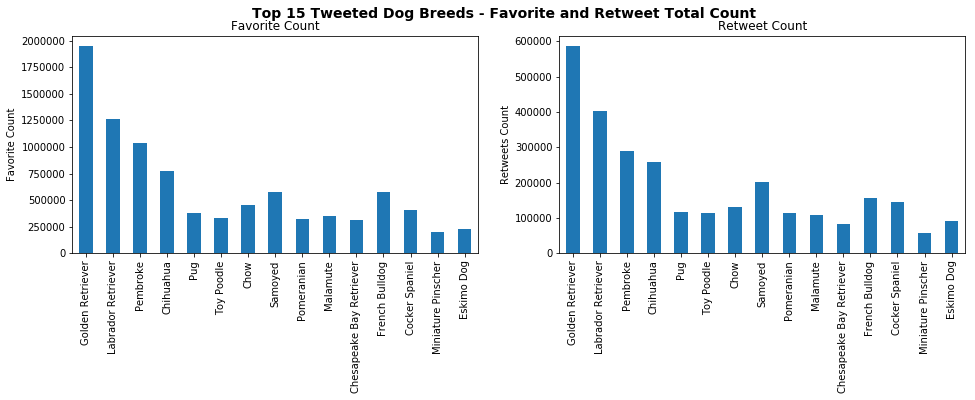

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2)


df = dog_breed_stats_df.iloc[1:16].transpose().iloc[2:4].transpose();
for i, c in enumerate(df.columns):
    df[c].plot(kind='bar', ax=axes[i], figsize=(16, 4), title=c)
    
# keep the y tick labels from getting too crowded
#plt.subplots_adjust(hspace = 1.0)
fig.suptitle("Top 15 Tweeted Dog Breeds - Favorite and Retweet Total Count", weight='bold', fontsize = 14);
axes[0].set_title('Favorite Count');
axes[1].set_title('Retweet Count');
axes[0].set_ylabel("Favorite Count")
axes[1].set_ylabel("Retweets Count")
plt.savefig('output/Top15favRT.png', bbox_inches='tight')

Taking that in consideration, let us look at the Mean Favorite and Retweet counts. It can clearly be seen the observation made before.

    - The French Bulldog is the most popular dog amongst users.
    - They only represent 3.6% of the Author's Tweets, but they tend to be favorited/retweeted the most.

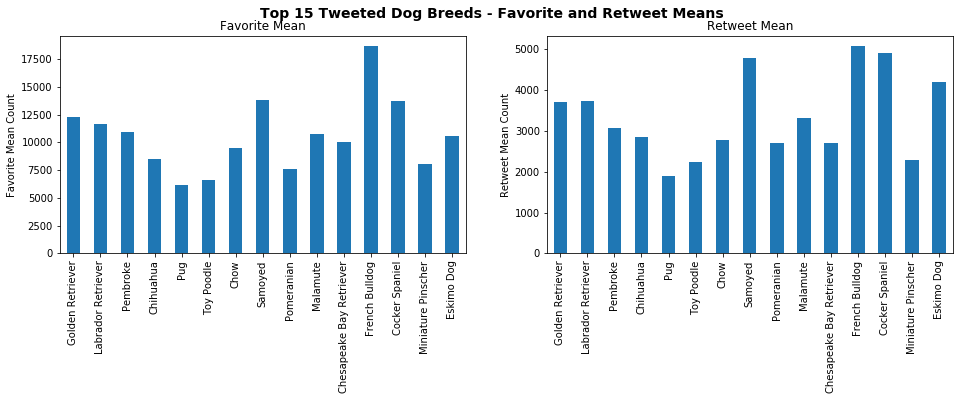

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2)


df = dog_breed_stats_df.iloc[1:16].transpose().iloc[6:8].transpose();
for i, c in enumerate(df.columns):
    df[c].plot(kind='bar', ax=axes[i], figsize=(16, 4), title=c)
    
# keep the y tick labels from getting too crowded
#plt.subplots_adjust(hspace = 1.0)
fig.suptitle("Top 15 Tweeted Dog Breeds - Favorite and Retweet Means", weight='bold', fontsize = 14);
axes[0].set_title('Favorite Mean');
axes[1].set_title('Retweet Mean');
axes[0].set_ylabel("Favorite Mean Count")
axes[1].set_ylabel("Retweet Mean Count")
plt.savefig('output/Top15Means.png', bbox_inches='tight')



Although the rating give by the author is not very accurate or a measurable unit, we can still show it here, since it is one of the best features of this Tweet page.

    - The Author of the page tends to give the best ratings to the Breed Chow
    - Although it also gives it a higher denominator, so the ratio is kept
    - It seems that the Pomeranian has the best rating

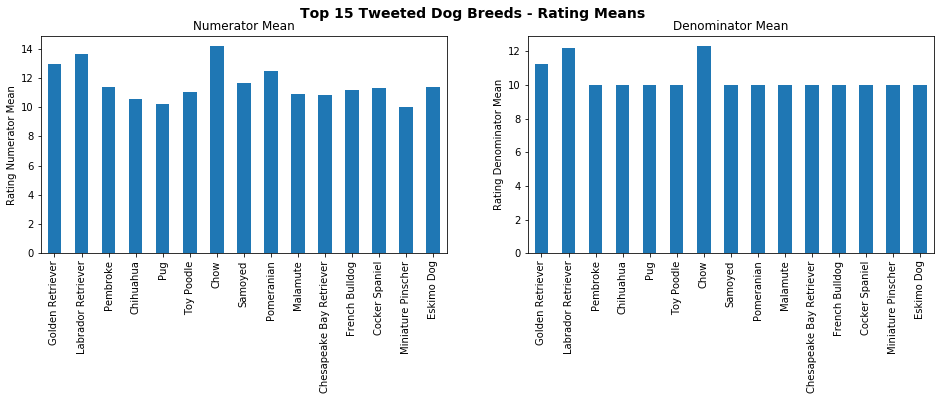

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2)


df = dog_breed_stats_df.iloc[1:16].transpose().iloc[4:6].transpose();
top_15 = list(df.transpose());
for i, c in enumerate(df.columns):
    df[c].plot(kind='bar', ax=axes[i], figsize=(16, 4), title=c)
    
# keep the y tick labels from getting too crowded
#plt.subplots_adjust(hspace = 1.0)
fig.suptitle("Top 15 Tweeted Dog Breeds - Rating Means", weight='bold', fontsize = 14);
axes[0].set_title('Numerator Mean');
axes[1].set_title('Denominator Mean');
axes[0].set_ylabel("Rating Numerator Mean")
axes[1].set_ylabel("Rating Denominator Mean")
plt.savefig('output/Top15RatMeans.png', bbox_inches='tight')


Bellow it is shown almost the same information has before, but now sorted by the Mean Favorited Dog Breed.
    
    - The French Bulldog, has seen, is the best Favorited Mean
    - Having the best Favorite Mean does not grant the best Retweet Mean
    - Same applies to the contrary relation (Seen bellow)

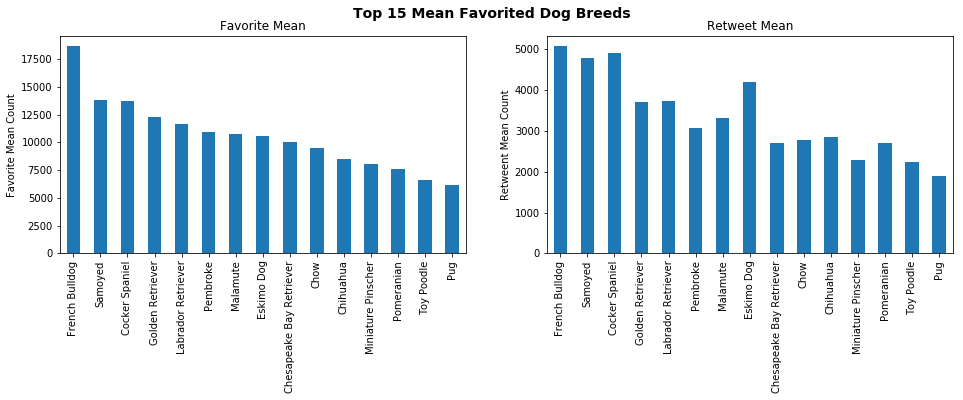

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=2)


df = dog_breed_stats_df[['favorite_count_mean','retweet_count_mean']].iloc[1:16].sort_values(by=['favorite_count_mean'], ascending = False).head(15);
mean_ft = list(df.transpose());
for i, c in enumerate(df.columns):
    df[c].plot(kind='bar', ax=axes[i], figsize=(16, 4), title=c)
    
# keep the y tick labels from getting too crowded
#plt.subplots_adjust(hspace = 1.0)
fig.suptitle("Top 15 Mean Favorited Dog Breeds", weight='bold', fontsize = 14);
axes[0].set_title('Favorite Mean');
axes[1].set_title('Retweet Mean');
axes[0].set_ylabel("Favorite Mean Count")
axes[1].set_ylabel("Retweent Mean Count")
plt.savefig('output/Top15BreedMeanFav.png', bbox_inches='tight')



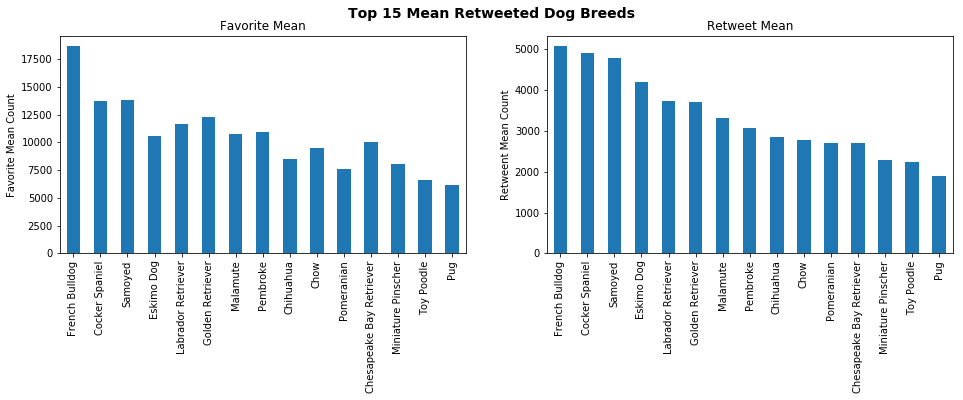

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2)


df = dog_breed_stats_df[['favorite_count_mean','retweet_count_mean']].iloc[1:16].sort_values(by=['retweet_count_mean'], ascending = False).head(15);
mean_rt = list(df.transpose());
for i, c in enumerate(df.columns):
    df[c].plot(kind='bar', ax=axes[i], figsize=(16, 4), title=c)
    
# keep the y tick labels from getting too crowded
#plt.subplots_adjust(hspace = 1.0)
fig.suptitle("Top 15 Mean Retweeted Dog Breeds", weight='bold', fontsize = 14);
axes[0].set_title('Favorite Mean');
axes[1].set_title('Retweet Mean');
axes[0].set_ylabel("Favorite Mean Count")
axes[1].set_ylabel("Retweent Mean Count")
plt.savefig('output/Top15BreedMeanRT.png', bbox_inches='tight')



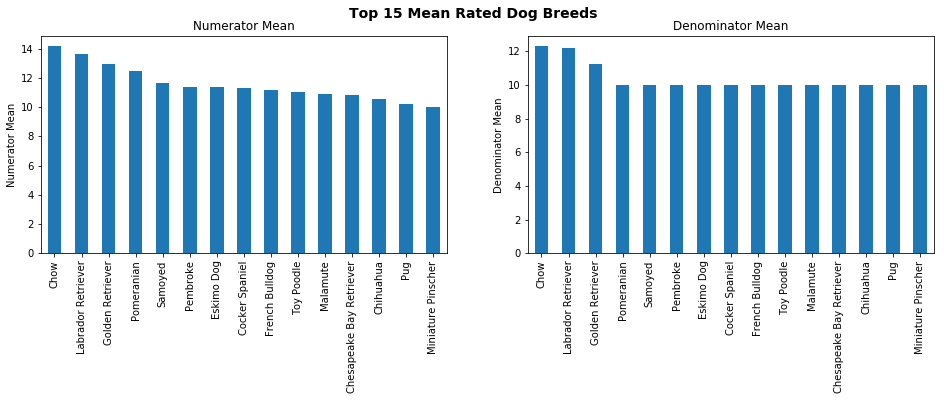

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2)


df = dog_breed_stats_df[['rating_num_mean','rating_den_mean']].iloc[1:16].sort_values(by=['rating_num_mean'], ascending = False);
mean_rat = list(df.transpose());
for i, c in enumerate(df.columns):
    df[c].plot(kind='bar', ax=axes[i], figsize=(16, 4), title=c)
    
# keep the y tick labels from getting too crowded
#plt.subplots_adjust(hspace = 1.0)
fig.suptitle("Top 15 Mean Rated Dog Breeds", weight='bold', fontsize = 14);
axes[0].set_title('Numerator Mean');
axes[1].set_title('Denominator Mean');
axes[0].set_ylabel("Numerator Mean")
axes[1].set_ylabel("Denominator Mean")
plt.savefig('output/Top15BreedMeanRating.png', bbox_inches='tight')



The following plots will show:
    
       - Sorted by Most Favorited Dog Breeds
       - Sorted by Most Retweeted Dog Breeds

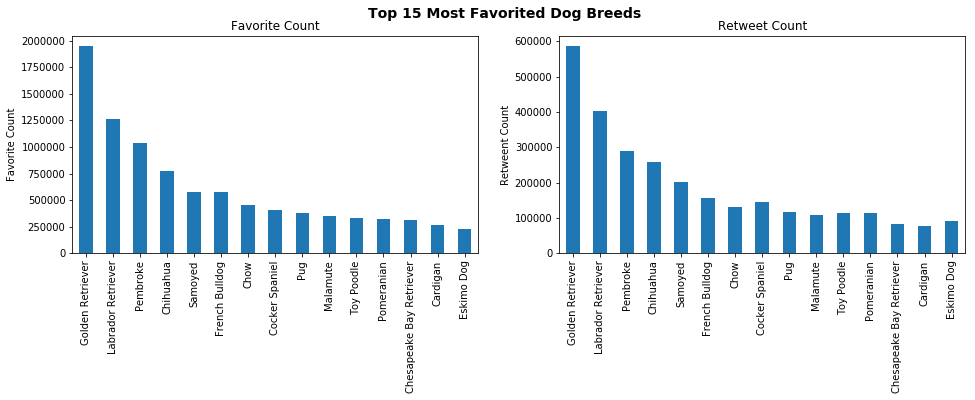

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2)


df = dog_breed_stats_df[['favorite_count_sum','retweet_count_sum']].sort_values(by=['favorite_count_sum'], ascending = False).iloc[1:16];
top_fav = list(df.transpose());
for i, c in enumerate(df.columns):
    df[c].plot(kind='bar', ax=axes[i], figsize=(16, 4), title=c)
    
# keep the y tick labels from getting too crowded
#plt.subplots_adjust(hspace = 1.0)
fig.suptitle("Top 15 Most Favorited Dog Breeds", weight='bold', fontsize = 14);
axes[0].set_title('Favorite Count');
axes[1].set_title('Retweet Count');
axes[0].set_ylabel("Favorite Count")
axes[1].set_ylabel("Retweent Count")
plt.savefig('output/Top15MostFav.png', bbox_inches='tight')



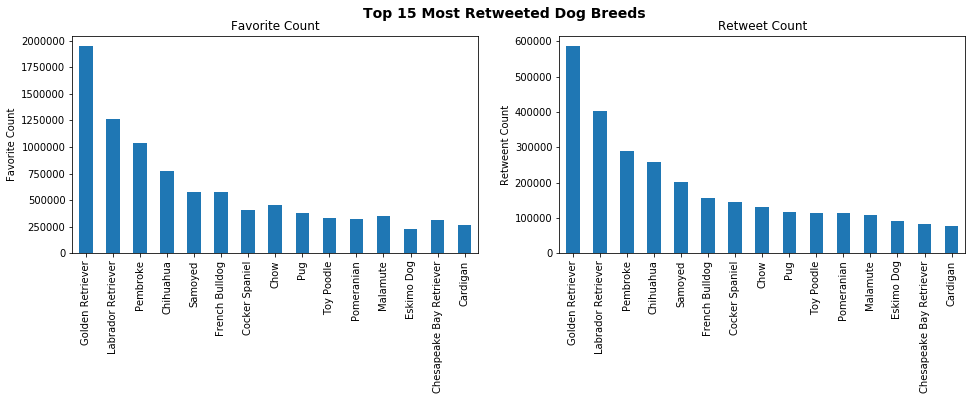

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=2)


df = dog_breed_stats_df[['favorite_count_sum','retweet_count_sum']].sort_values(by=['retweet_count_sum'], ascending = False).iloc[1:16];
top_rt = list(df.transpose());
for i, c in enumerate(df.columns):
    df[c].plot(kind='bar', ax=axes[i], figsize=(16, 4), title=c)
    
# keep the y tick labels from getting too crowded
#plt.subplots_adjust(hspace = 1.0)
fig.suptitle("Top 15 Most Retweeted Dog Breeds", weight='bold', fontsize = 14);
axes[0].set_title('Favorite Count');
axes[1].set_title('Retweet Count');
axes[0].set_ylabel("Favorite Count")
axes[1].set_ylabel("Retweent Count")
plt.savefig('output/Top15MostRT.png', bbox_inches='tight')



## Most Popular Dog Breed

Taking in consideration all shown above, we can say that the most Popular Breeds are the following, in no particular order.

    - Samoyed                     
    - Eskimo Dog                  
    - Pembroke                    
    - Malamute                    
    - Labrador Retriever          
    - Chow                        
    - Golden Retriever            
    - Cocker Spaniel              
    - Toy Poodle                  
    - Chesapeake Bay Retriever    
    - French Bulldog              
    - Pomeranian                  
    - Chihuahua                   
    - Pug                         

These dog Breeds show up on every plot shown above, which have all sorts of different measureable analytics. If one takes in consideration just the average Favorited/Retweets, one has to say that the French Bulldog will be the most popula dog Breed amongst users.

In [66]:
all_dog_tops = pd.Series(top_15 + mean_rt + mean_ft + mean_rat + top_fav + top_rt)
all_dog_tops_sorted = pd.Series(all_dog_tops.value_counts())
all_dog_tops_sorted[all_dog_tops_sorted == all_dog_tops_sorted.max()]

Samoyed                     6
Cocker Spaniel              6
Golden Retriever            6
Chihuahua                   6
French Bulldog              6
Chow                        6
Pomeranian                  6
Eskimo Dog                  6
Toy Poodle                  6
Pug                         6
Pembroke                    6
Labrador Retriever          6
Chesapeake Bay Retriever    6
Malamute                    6
dtype: int64

# Analysis by Dog Stage (Puppo, Floofer, Doggo, Pupper)

In [67]:
dog_stages_stats_df

,count,count_per,favorite_count_sum,retweet_count_sum,rating_num_mean,rating_den_mean,favorite_count_mean,retweet_count_mean
not_defined,1802,84.127,15324184,4697720,12.4023,10.5694,8503.99,2606.95
pupper,224,10.4575,1593158,543738,10.808,10,7112.31,2427.4
doggo,84,3.92157,1472466,531492,11.7619,10,17529.4,6327.29
puppo,23,1.07376,502427,151511,12,10,21844.7,6587.43
floofer,9,0.420168,98663,36898,11.8889,10,10962.6,4099.78


Let us now focus on influence of the dog stage on the statistics of the tweets. Unfortunately, we do no have a lot of observations to draw conclusions from, so this will be a rather limited analysis. Please refer to the bar graphs bellow. 

    - Puppos are definetely the most popular amongst users. On average they tend to be Favorited and Retweeted more than any other stage.

    - The owner of the page tends to give the same rating to all stages, a little bit less to puppers.

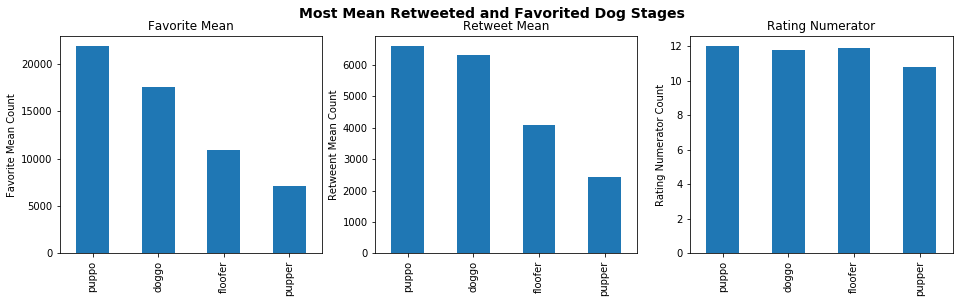

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=3)

df = dog_stages_stats_df.iloc[1:5].transpose().iloc[[6,7,4]].transpose().sort_values(by=['retweet_count_mean'], ascending = False)

for i, c in enumerate(df.columns):
    df[c].plot(kind='bar', ax=axes[i], figsize=(16, 4), title=c)
    
# keep the y tick labels from getting too crowded
#plt.subplots_adjust(hspace = 1.0)
fig.suptitle("Most Mean Retweeted and Favorited Dog Stages", weight='bold', fontsize = 14);
axes[0].set_title('Favorite Mean');
axes[1].set_title('Retweet Mean');
axes[2].set_title('Rating Numerator');
axes[0].set_ylabel("Favorite Mean Count")
axes[1].set_ylabel("Retweent Mean Count")
axes[2].set_ylabel("Rating Numerator Count")
plt.savefig('output/DogStageMostMean.png', bbox_inches='tight')


If we look at the absolute numbers, we can see that:

    - The author is biased to post Puppers, or at least to refer to dogs has Puppers on the posts. 
            It far exceeds any other dog stage posted
    
    - Despite that fact, users tend to Favorite and Retweet almost equally Puppers and Doggos. 
            Puppos and Floofers get very little love from Tweeter users on absolute terms, but this is due tot he fact that there are very little posts mentioning them.

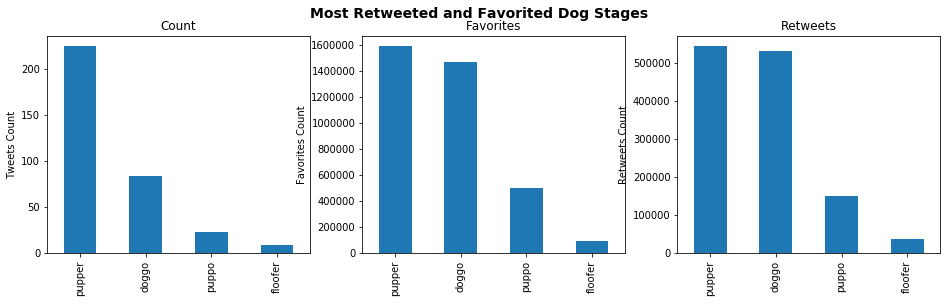

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=3)

df = dog_stages_stats_df.iloc[1:5].transpose().iloc[[0,2,3]].transpose().sort_values(by=['retweet_count_sum'], ascending = False)

for i, c in enumerate(df.columns):
    df[c].plot(kind='bar', ax=axes[i], figsize=(16, 4), title=c)
    
# keep the y tick labels from getting too crowded
#plt.subplots_adjust(hspace = 1.0)
fig.suptitle("Most Retweeted and Favorited Dog Stages", weight='bold', fontsize = 14);
axes[0].set_title('Count');
axes[1].set_title('Favorites');
axes[2].set_title('Retweets');
axes[0].set_ylabel("Tweets Count")
axes[1].set_ylabel("Favorites Count")
axes[2].set_ylabel("Retweets Count")

plt.savefig('output/DogStageMostRTFav.png', bbox_inches='tight')


# Analysis by Weekday

In [70]:
weekday_stats_df

,count,count_per,favorite_count_sum,retweet_count_sum,rating_num_mean,rating_den_mean,favorite_count_mean,retweet_count_mean
Sunday,274,12.7918,2371771,723797,13.0073,10.9124,8656.1,2641.59
Monday,356,16.62,3044433,953858,15.4522,10.1124,8551.78,2679.38
Tuesday,319,14.8926,2845248,863390,11.4545,10.6897,8919.27,2706.55
Wednesday,319,14.8926,3197782,1023370,10.627,10.094,10024.4,3208.06
Thursday,302,14.099,2506778,772863,11.5033,10.4636,8300.59,2559.15
Friday,298,13.9122,2582356,825072,12.1812,11.1611,8665.62,2768.7
Saturday,274,12.7918,2442530,799009,10.6861,10,8914.34,2916.09


Let us now focus on each particular day of the week and its influence on our data. Bellow is shown that bar graph for each day of the week and a respective statistic. On the first set we can infer the following:

- The owner of the page posts the most on Mondays. 16.6% of the posts occur on a Monday versus 12.8% on Sunday and Saturday, the day he posts the least.

- People tend to like (Favorite) his posts more on Wednesdays.

- People Retweet his posts more on Wednesdays

One can say that users tend to like/retweet his posts with two days lag or that posting more does not grant an increased activity in Favorites and Reteweets.

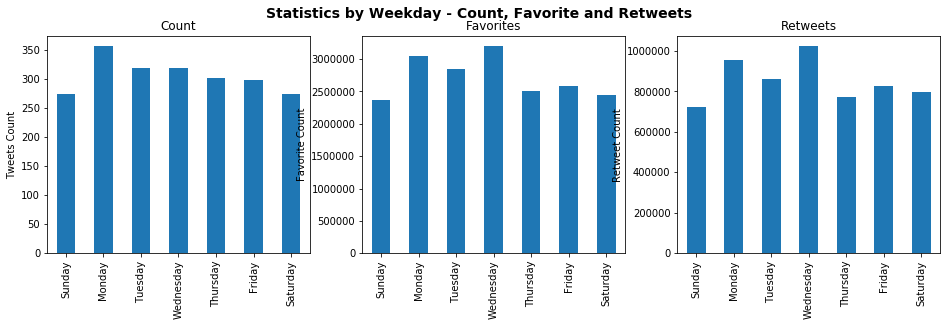

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=3)

df = weekday_stats_df.transpose().iloc[[0,2,3]].transpose()

for i, c in enumerate(df.columns):
    df[c].plot(kind='bar', ax=axes[i], figsize=(16, 4), title=c)
    
# keep the y tick labels from getting too crowded
#plt.subplots_adjust(hspace = 1.0)
fig.suptitle("Statistics by Weekday - Count, Favorite and Retweets", weight='bold', fontsize = 14);
axes[0].set_title('Count');
axes[1].set_title('Favorites');
axes[2].set_title('Retweets');
axes[0].set_ylabel("Tweets Count")
axes[1].set_ylabel("Favorite Count")
axes[2].set_ylabel("Retweet Count")
plt.savefig('output/WeekdayCountRTFav.png', bbox_inches='tight')


Furthering the analysis by weekday, please refer to the plots bellow:

- The average Favorite and Retweet (Average per Tweet) are higher on Wednesdays. This serves as extra confirmation of what was mentioned above.

- The author of the page tends to give better ratings to dogs on Mondays, on average. 

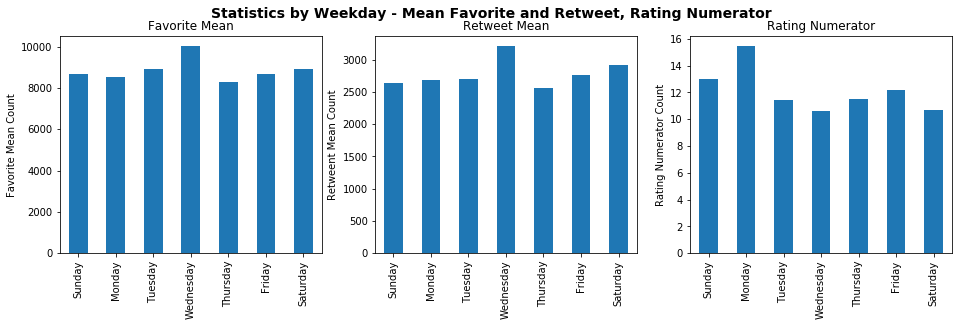

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=3)

df = weekday_stats_df.transpose().iloc[[6,7,4]].transpose()

for i, c in enumerate(df.columns):
    df[c].plot(kind='bar', ax=axes[i], figsize=(16, 4), title=c)
    
# keep the y tick labels from getting too crowded
#plt.subplots_adjust(hspace = 1.0)
fig.suptitle("Statistics by Weekday - Mean Favorite and Retweet, Rating Numerator", weight='bold', fontsize = 14);
axes[0].set_title('Favorite Mean');
axes[1].set_title('Retweet Mean');
axes[2].set_title('Rating Numerator');
axes[0].set_ylabel("Favorite Mean Count")
axes[1].set_ylabel("Retweent Mean Count")
axes[2].set_ylabel("Rating Numerator Count")
plt.savefig('output/WeekdayMeanCountRTFav.png', bbox_inches='tight')


# Best Tweets

## Most Favorited Tweet

The most favorited Tweet was of a Lakeland Terrier, Puppo stage. Analysing the tweet, one can explain why this got the most Favorites. This was tweeted one day after President Trump assumed the Presidency, on Jannuary 21st 2017, during a #Womensmarch. This was a highly controversial period when people turned to the Social Media and were highly active with the use of popular hashtags.

Refer to the table bellow with the Top 5 Most Favorited Tweets.

In [73]:
twitter_archive_master.sort_values(by=['favorite_count'], ascending = False).head()[['created_at','favorite_count','retweet_count','name','url','rating_num','dog_stage','breed' ]]

,created_at,favorite_count,retweet_count,name,url,rating_num,dog_stage,breed
331,2017-01-21 18:26:02,131574,47597,Not Defined,https://t.co/nTz3FtorBc,13,puppo,Lakeland Terrier
838,2016-06-18 18:26:18,129874,78618,Not Defined,https://t.co/7wE9LTEXC4,13,doggo,Labrador Retriever
427,2016-12-09 06:17:20,124066,62106,Stephan,https://t.co/DkBYaCAg2d,13,not_defined,Chihuahua
60,2017-06-26 19:07:24,107226,45362,Duddles,https://t.co/UDT7ZkcTgY,13,not_defined,English Springer
115,2017-05-22 00:28:40,105941,32475,Jamesy,https://t.co/wk7TfysWHr,13,pupper,French Bulldog


## Most Retweeted Tweet

The most Retweeted was a video of an adorable Labrador Retriever in the Doggo Stage. This tweet did not use any special hashtags nor was posted during a particular special time. This proves that Tweets can go viral with good content and quality, such is in this video, completely worth watching it.

Refer to the table bellow with the Top 5 Most Retweeted Tweets.

In [74]:
twitter_archive_master.sort_values(by=['retweet_count'], ascending = False).head()[['created_at','favorite_count','retweet_count','name','url','rating_num','dog_stage','breed' ]]

,created_at,favorite_count,retweet_count,name,url,rating_num,dog_stage,breed
838,2016-06-18 18:26:18,129874,78618,Not Defined,https://t.co/7wE9LTEXC4,13,doggo,Labrador Retriever
427,2016-12-09 06:17:20,124066,62106,Stephan,https://t.co/DkBYaCAg2d,13,not_defined,Chihuahua
877,2016-06-04 23:31:25,74352,51738,Not Defined,https://t.co/YcXgHfp1EC,13,doggo,Eskimo Dog
331,2017-01-21 18:26:02,131574,47597,Not Defined,https://t.co/nTz3FtorBc,13,puppo,Lakeland Terrier
60,2017-06-26 19:07:24,107226,45362,Duddles,https://t.co/UDT7ZkcTgY,13,not_defined,English Springer


# Final Remarks

After this careful and extensive analysis, we can offer the following insights to increase the odds to the users that pretend to be featured on the WeRateDogs page and have his dog seen by the world:

    - Having a Golden Retriever or Labrador Retriever in the Pupper stage
    - On Mondays the Author will Tweet the most
    - Tweets are more Favorited/Retweeted on Wednesdays
    - Author tends to give better Ratings on Mondays
    - Having a French Bulldog seems to be popular amongst Twitter Users
    - Puppos tend to be Favorited/Retweeted the most on average by Users
    - Use of particular hashtags that are viral due to the circumstance of the season